# EDA for Bangkok historical weather data (2020-2025) 🇹🇭

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme(style="whitegrid")
%matplotlib inline

## Load and prepare the data

In [3]:
df = pd.read_csv("../data/raw/open-meteo-13.74N100.50E7m-Bangkok.csv")
df['time'] = pd.to_datetime(df['time'])
df['month'] = df['time'].dt.month_name()

month_order = ['January', 'February', 'March', 'April', 'May', 'June','July','August','September', 'October', 'November', 'December']
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)

df.head()

,time,weather_code (wmo code),temperature_2m_mean (°C),apparent_temperature_mean (°C),relative_humidity_2m_mean (%),wind_speed_10m_mean (km/h),city,month
0,2020-01-01,3,29.0,30.3,54,13.1,Bangkok,January
1,2020-01-02,3,28.6,30.3,57,11.4,Bangkok,January
2,2020-01-03,3,28.9,30.8,54,9.3,Bangkok,January
3,2020-01-04,2,28.8,31.3,58,7.8,Bangkok,January
4,2020-01-05,0,29.0,31.0,55,8.9,Bangkok,January


## General dataset overview

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   time                            1994 non-null   datetime64[ns]
 1   weather_code (wmo code)         1994 non-null   int64         
 2   temperature_2m_mean (°C)        1994 non-null   float64       
 3   apparent_temperature_mean (°C)  1994 non-null   float64       
 4   relative_humidity_2m_mean (%)   1994 non-null   int64         
 5   wind_speed_10m_mean (km/h)      1994 non-null   float64       
 6   city                            1994 non-null   object        
 7   month                           1994 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 111.5+ KB


In [5]:
df.describe()

,time,weather_code (wmo code),temperature_2m_mean (°C),apparent_temperature_mean (°C),relative_humidity_2m_mean (%),wind_speed_10m_mean (km/h)
count,1994,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,2022-09-23 12:00:00,41.693581,28.193480,32.586058,74.190070,8.706469
min,2020-01-01 00:00:00,0.000000,20.500000,19.500000,39.000000,2.300000
25%,2021-05-13 06:00:00,3.000000,27.300000,31.400000,68.000000,6.700000
50%,2022-09-23 12:00:00,53.000000,28.200000,33.100000,76.000000,8.350000
75%,2024-02-03 18:00:00,63.000000,29.200000,34.400000,82.000000,10.375000
max,2025-06-16 00:00:00,65.000000,33.200000,38.600000,92.000000,18.700000
std,NaN,25.485489,1.740096,2.803690,10.344662,2.728319


In [6]:
df.dtypes

time                              datetime64[ns]
weather_code (wmo code)                    int64
temperature_2m_mean (°C)                 float64
apparent_temperature_mean (°C)           float64
relative_humidity_2m_mean (%)              int64
wind_speed_10m_mean (km/h)               float64
city                                      object
month                                   category
dtype: object

In [7]:
df.isnull().sum()

time                              0
weather_code (wmo code)           0
temperature_2m_mean (°C)          0
apparent_temperature_mean (°C)    0
relative_humidity_2m_mean (%)     0
wind_speed_10m_mean (km/h)        0
city                              0
month                             0
dtype: int64

In [8]:
df.duplicated(['city', 'time']).sum()

np.int64(0)

> No null values nor duplicates found

## Univariate analysis

## Daily temperature distribution
> The number of days when the mean temperature fell within a certain range

Text(0.5, 0, 'Temperature (°C)')

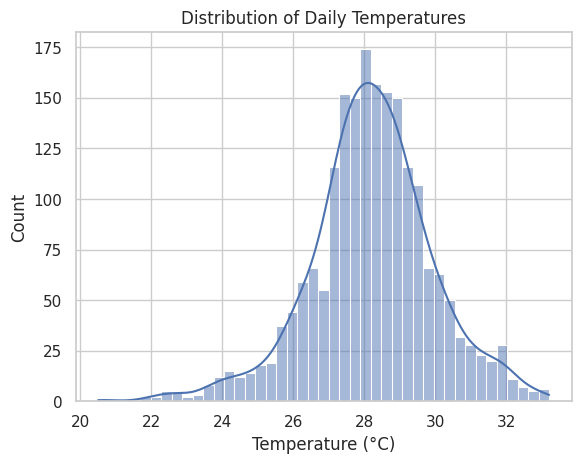

In [9]:
sns.histplot(df['temperature_2m_mean (°C)'], kde=True)
plt.title("Distribution of Daily Temperatures")
plt.xlabel("Temperature (°C)")

- Most temperatures fall between **27.5°C and 29°C**
- Most common average daily temperature: **28°C**
- Very few extremely cold days (<25°C)

## Daily humidity distribution

Text(0.5, 1.0, 'Humidity Level Distribution')

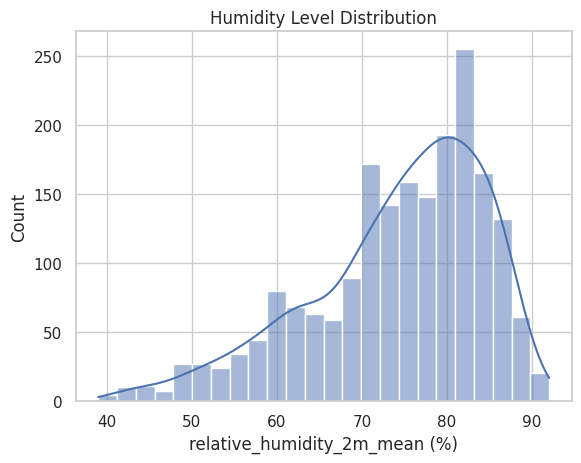

In [10]:
sns.histplot(df['relative_humidity_2m_mean (%)'], kde=True)
plt.title("Humidity Level Distribution")

- Most days have an average or slightly above average humidity percentage **(<85%)**

## Daily apparent temperature distribution

Text(0.5, 1.0, 'Apparent Temperature Distribution')

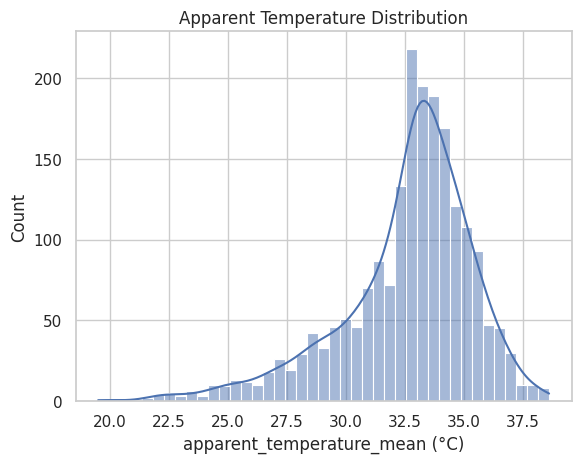

In [11]:
sns.histplot(df['apparent_temperature_mean (°C)'], kde=True)
plt.title("Apparent Temperature Distribution")

- Bangkok has a **very warm perceived climate** year-round
- It feels like 32°C on most days

## In-depth analysis

### Actual vs Apparent Temperature

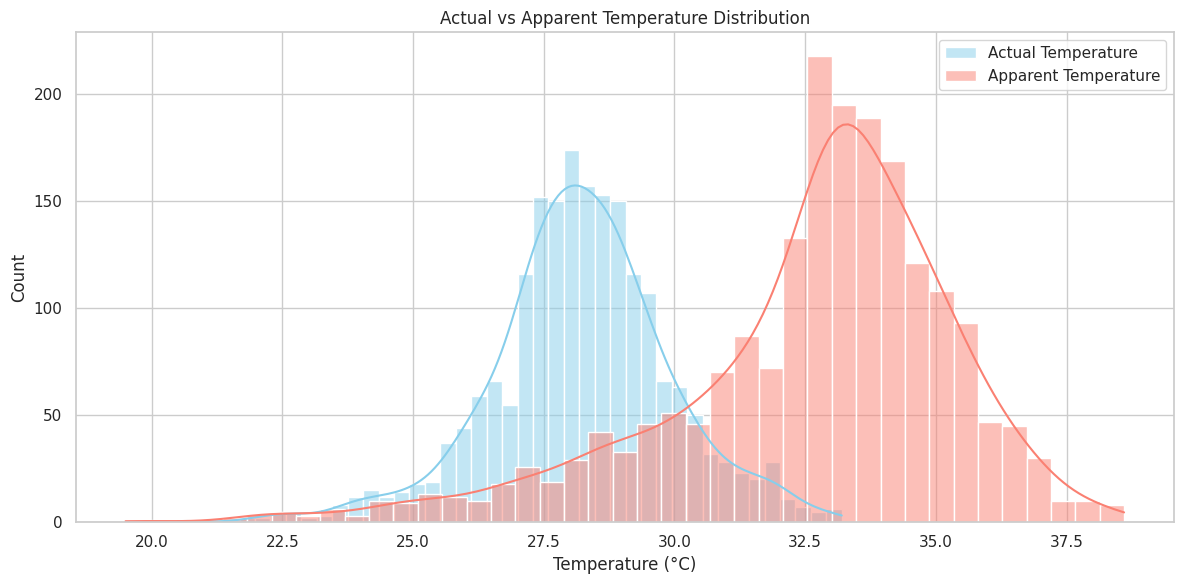

In [12]:
plt.figure(figsize=(12, 6))

sns.histplot(df['temperature_2m_mean (°C)'], kde=True, color='skyblue', label='Actual Temperature', stat="count")

sns.histplot(df['apparent_temperature_mean (°C)'], kde=True, color='salmon', label='Apparent Temperature', stat="count")

plt.title("Actual vs Apparent Temperature Distribution")
plt.xlabel("Temperature (°C)")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

- Temperature feels a lot higher than actual temperature
- The city tends to feel hotter than it is

In [13]:
# Compute monthly averages
monthly_avg = df.groupby('month', as_index=False, observed=True).agg({
    'temperature_2m_mean (°C)': 'mean',
    'relative_humidity_2m_mean (%)': 'mean'
})
# Ensure the month order is preserved after grouping
monthly_avg['month'] = pd.Categorical(
    monthly_avg['month'],
    categories=month_order,
    ordered=True
)

# Then sort by month
monthly_avg = monthly_avg.sort_values('month')


print(monthly_avg)

        month  temperature_2m_mean (°C)  relative_humidity_2m_mean (%)
0     January                 27.014516                      60.919355
1    February                 27.939412                      68.123529
2       March                 29.354301                      72.037634
3       April                 30.027222                      73.000000
4         May                 29.567204                      77.139785
5        June                 29.051807                      76.867470
6        July                 28.223226                      80.677419
7      August                 28.135484                      81.006452
8   September                 27.520667                      84.046667
9     October                 26.945806                      83.064516
10   November                 27.250000                      74.220000
11   December                 26.636774                      62.580645


### Monthly average temperature and humidity

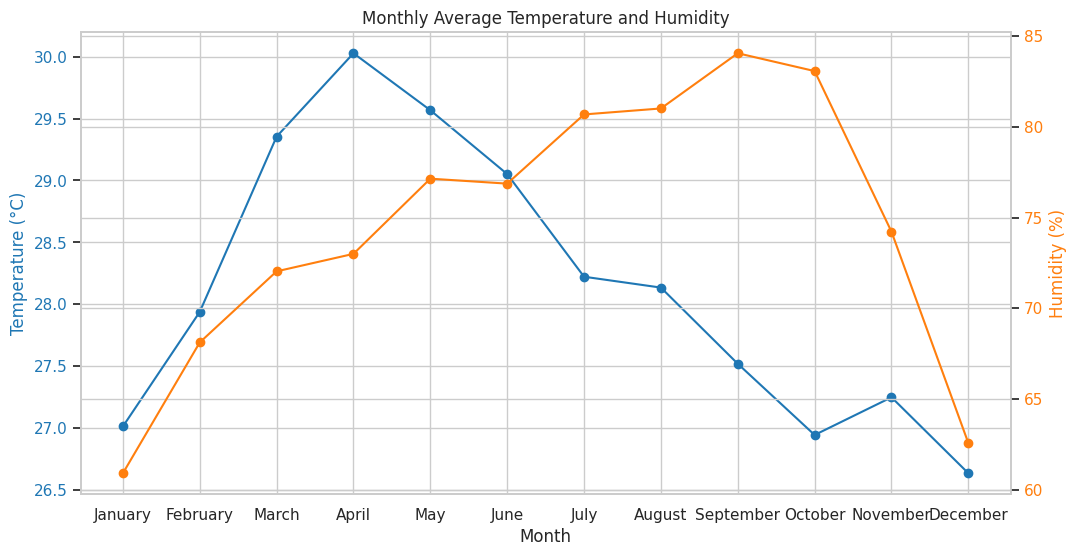

In [14]:
# Average monthly temperature and humidity plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot temperature on left axis
ax1.set_xlabel('Month')
ax1.set_ylabel('Temperature (°C)', color='tab:blue')
ax1.plot(monthly_avg['month'], monthly_avg['temperature_2m_mean (°C)'],
         marker='o', color='tab:blue', label='Temperature')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for humidity
ax2 = ax1.twinx()
ax2.set_ylabel('Humidity (%)', color='tab:orange')
ax2.plot(monthly_avg['month'], monthly_avg['relative_humidity_2m_mean (%)'],
         marker='o', color='tab:orange', label='Humidity')
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title("Monthly Average Temperature and Humidity")
plt.xticks(rotation=45)
plt.show()

## Correlations of each numerical value

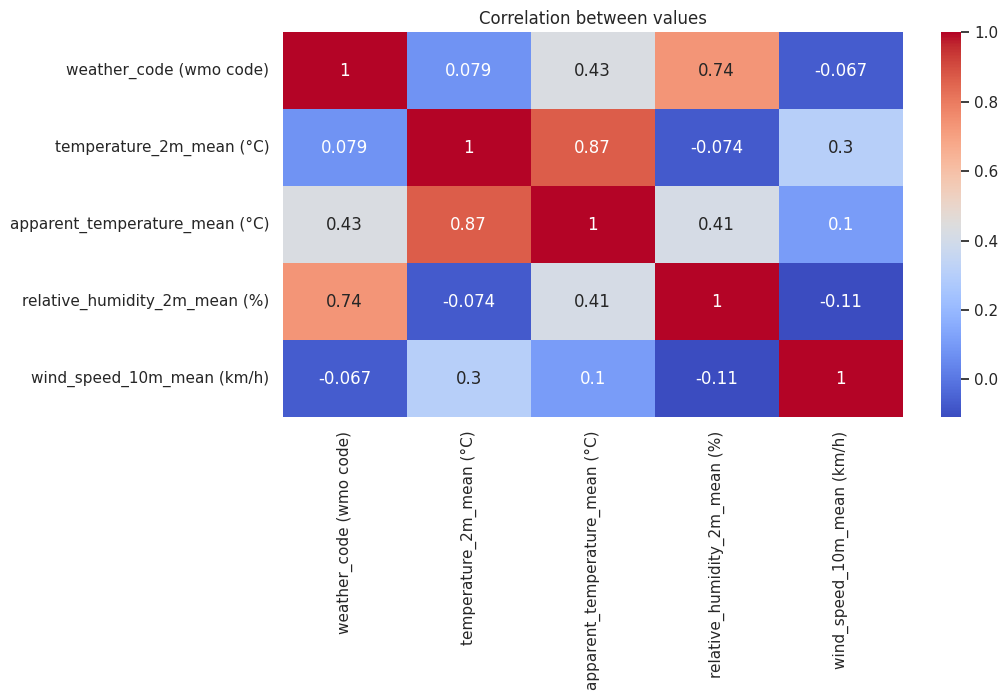

In [15]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation between values")
plt.show()

- The weather code and relative humidity are positively correlated
- Actual Temperature and relative humidity correlation is barely positive
- Relative humidity and apparent temperature value seems to rise together